In [1]:
# Yi-Lin Lou (Aaron) 301226659

import pandas as pd
import tensorflow as tf

#load the dataset

data_path = r'./data/default of credit card clients.xls'
df = pd.read_excel(data_path, header=0)
df.head(5)

ID  LIMIT_BAL SEX   EDUCATION MARRIAGE  AGE  PAYDELAY_MONTH1  \
0   1      20000   F  university  married   24                2   
1   2     120000   F  university   single   26               -1   
2   3      90000   F  university   single   34                0   
3   4      50000   F  university  married   37                0   
4   5      50000   M  university  married   57               -1   

   PAYDELAY_MONTH2  PAYDELAY_MONTH3  PAYDELAY_MONTH4  ...  BILL_AMT4  \
0                2               -1               -1  ...          0   
1                2                0                0  ...       3272   
2                0                0                0  ...      14331   
3                0                0                0  ...      28314   
4                0               -1                0  ...      20940   

   BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0          0          0         0       689         0         0         0   
1       3455       3261         0      1000      1000      1000         0   
2      14948      15549      1518      1500      1000      1000      1000   
3      28959      29547      2000      2019      1200      1100      1069   
4      19146      19131      2000     36681     10000      9000       689   

   PAY_AMT6  default payment next month  
0         0                           1  
1      2000                           1  
2      5000                           0  
3      1000                           0  
4       679                           0  

[5 rows x 25 columns]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29601 entries, 0 to 29600
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29601 non-null  int64 
 1   LIMIT_BAL                   29601 non-null  int64 
 2   SEX                         29601 non-null  object
 3   EDUCATION                   29601 non-null  object
 4   MARRIAGE                    29601 non-null  object
 5   AGE                         29601 non-null  int64 
 6   PAYDELAY_MONTH1             29601 non-null  int64 
 7   PAYDELAY_MONTH2             29601 non-null  int64 
 8   PAYDELAY_MONTH3             29601 non-null  int64 
 9   PAYDELAY_MONTH4             29601 non-null  int64 
 10  PAYDELAY_MONTH5             29601 non-null  int64 
 11  PAYDELAY_MONTH6             29601 non-null  int64 
 12  BILL_AMT1                   29601 non-null  int64 
 13  BILL_AMT2                   29601 non-null  in

In [12]:
df.describe(include='all').T

count unique         top   freq           mean  \
ID                          29601.0    NaN         NaN    NaN   14971.758927   
LIMIT_BAL                   29601.0    NaN         NaN    NaN  167550.544914   
SEX                           29601      2           F  17855            NaN   
EDUCATION                     29601      4  university  14024            NaN   
MARRIAGE                      29601      3      single  15806            NaN   
AGE                         29601.0    NaN         NaN    NaN      35.464072   
PAYDELAY_MONTH1             29601.0    NaN         NaN    NaN      -0.014932   
PAYDELAY_MONTH2             29601.0    NaN         NaN    NaN      -0.131313   
PAYDELAY_MONTH3             29601.0    NaN         NaN    NaN       -0.16344   
PAYDELAY_MONTH4             29601.0    NaN         NaN    NaN      -0.218303   
PAYDELAY_MONTH5             29601.0    NaN         NaN    NaN      -0.263978   
PAYDELAY_MONTH6             29601.0    NaN         NaN    NaN      -0.287558   
BILL_AMT1                   29601.0    NaN         NaN    NaN   50957.432012   
BILL_AMT2                   29601.0    NaN         NaN    NaN   48942.189554   
BILL_AMT3                   29601.0    NaN         NaN    NaN    46803.20327   
BILL_AMT4                   29601.0    NaN         NaN    NaN   43122.554204   
BILL_AMT5                   29601.0    NaN         NaN    NaN   40235.545184   
BILL_AMT6                   29601.0    NaN         NaN    NaN   38858.449816   
PAY_AMT1                    29601.0    NaN         NaN    NaN    5649.560319   
PAY_AMT2                    29601.0    NaN         NaN    NaN    5894.788386   
PAY_AMT3                    29601.0    NaN         NaN    NaN    5198.415898   
PAY_AMT4                    29601.0    NaN         NaN    NaN    4828.659268   
PAY_AMT5                    29601.0    NaN         NaN    NaN    4795.032735   
PAY_AMT6                    29601.0    NaN         NaN    NaN    5181.326374   
default payment next month  29601.0    NaN         NaN    NaN       0.223134   

                                      std       min      25%       50%  \
ID                             8660.18443       1.0   7474.0   14953.0   
LIMIT_BAL                   129944.020953   10000.0  50000.0  140000.0   
SEX                                   NaN       NaN      NaN       NaN   
EDUCATION                             NaN       NaN      NaN       NaN   
MARRIAGE                              NaN       NaN      NaN       NaN   
AGE                              9.213243      21.0     28.0      34.0   
PAYDELAY_MONTH1                  1.124503      -2.0     -1.0       0.0   
PAYDELAY_MONTH2                  1.199642      -2.0     -1.0       0.0   
PAYDELAY_MONTH3                  1.199793      -2.0     -1.0       0.0   
PAYDELAY_MONTH4                   1.17222      -2.0     -1.0       0.0   
PAYDELAY_MONTH5                  1.136217      -2.0     -1.0       0.0   
PAYDELAY_MONTH6                  1.152206      -2.0     -1.0       0.0   
BILL_AMT1                    73370.242404 -165580.0   3528.0   22259.0   
BILL_AMT2                    70923.985151  -69777.0   2970.0   21050.0   
BILL_AMT3                    69123.892106 -157264.0   2652.0   20035.0   
BILL_AMT4                    64196.383913 -170000.0   2329.0   19005.0   
BILL_AMT5                    60699.344884  -81334.0   1780.0   18091.0   
BILL_AMT6                    59519.893043 -339603.0   1278.0   17118.0   
PAY_AMT1                     16568.264941       0.0   1000.0    2100.0   
PAY_AMT2                     23089.193621       0.0    825.0    2007.0   
PAY_AMT3                     17580.914806       0.0    390.0    1800.0   
PAY_AMT4                     15711.057992       0.0    298.0    1500.0   
PAY_AMT5                     15244.217154       0.0    259.0    1500.0   
PAY_AMT6                     17657.260739       0.0    138.0    1500.0   
default payment next month       0.416355       0.0      0.0       0.0   

                        

In [3]:
df['default payment next month'].value_counts()

default payment next month
0    22996
1     6605
Name: count, dtype: int64

In [8]:
df['EDUCATION'].value_counts()

EDUCATION
university         14024
graduate school    10581
high school         4873
others               123
Name: count, dtype: int64

In [9]:
df['SEX'].value_counts()

SEX
F    17855
M    11746
Name: count, dtype: int64

In [10]:
df['PAYDELAY_MONTH1'].value_counts()

PAYDELAY_MONTH1
 0    14499
-1     5633
 1     3662
-2     2708
 2     2640
 3      320
 4       76
 5       24
 8       19
 6       11
 7        9
Name: count, dtype: int64

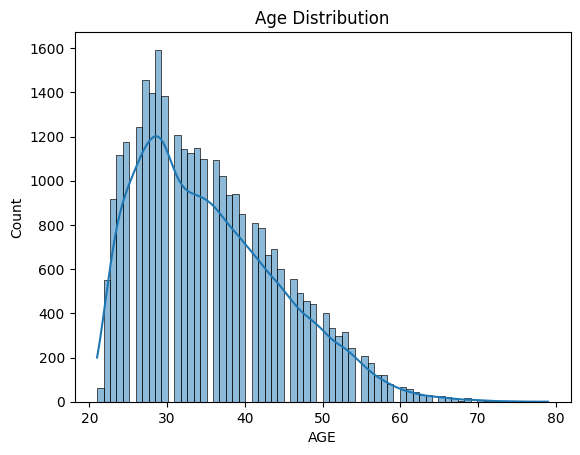

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# age histogram
sns.histplot(df['AGE'], kde=True)
plt.title('Age Distribution')
plt.show()

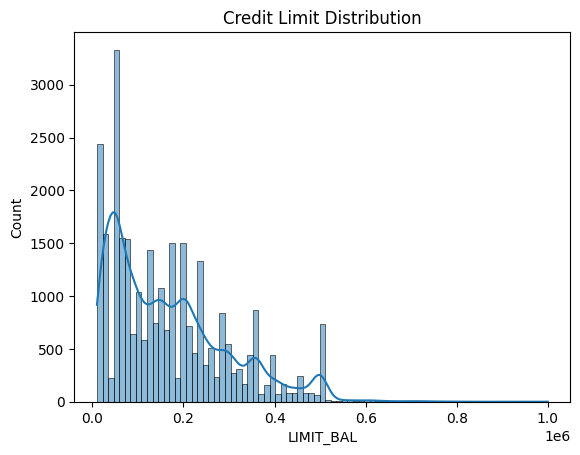

In [7]:
# credit limit histogram
sns.histplot(df['LIMIT_BAL'], kde=True)
plt.title('Credit Limit Distribution')
plt.show()

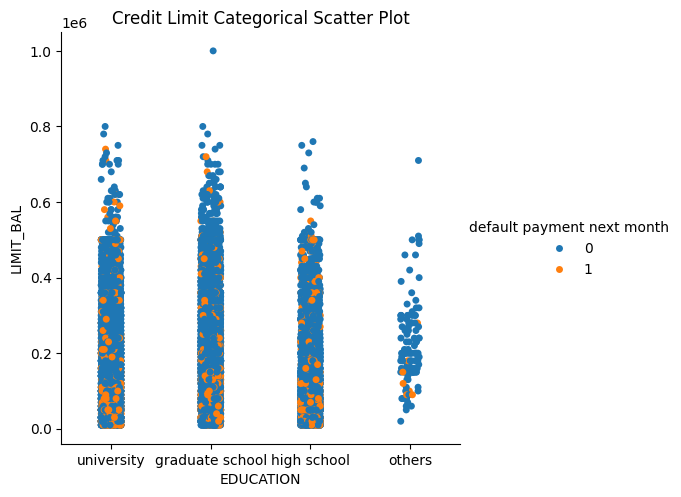

In [5]:
# cat plot for limit_bal
sns.catplot(data=df, x='EDUCATION', y='LIMIT_BAL', hue='default payment next month')
plt.title('Credit Limit Categorical Scatter Plot')
plt.show()